# Build Pharmacophore Model

Pharmacophore models can be built using crystal structures, docking poses, or smiles strings. The latter requires the generation of molecules in

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import datamol as dm
from pharmacophore import Pharmacophore, Draw

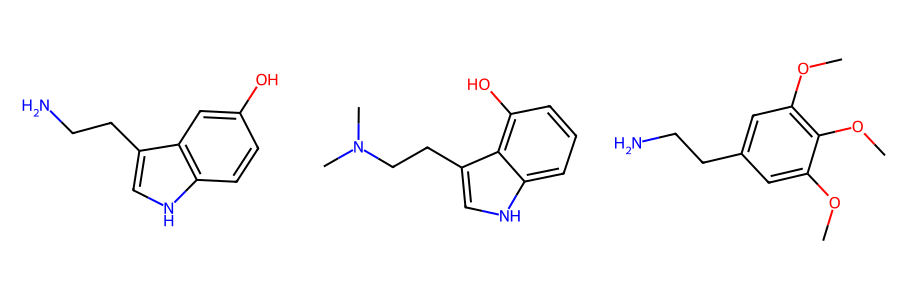

In [2]:
molecules = {"serotonin": "C1=CC2=C(C=C1O)C(=CN2)CCN",
             "psilocin": "CN(C)CCc1c[nH]c2cccc(O)c12",
             "mescaline": "O(c1cc(cc(OC)c1OC)CCN)C"}

mol_smi = [x for x in molecules.values()]
mol_name = [x for x in molecules.keys()]

mols = [Chem.MolFromSmiles(x) for x in mol_smi]
dm.viz.to_image(mols)

In [3]:
mols = [Chem.AddHs(m) for m in mols]
ps = AllChem.ETKDGv3()
ps.randomSeed = 42  # we seed the RNG so that this is reproducible
for m in mols:
    AllChem.EmbedMolecule(m,ps)

In [4]:
for mol, name in zip(mols, mol_name):
    w = Chem.SDWriter(f"data/{name}.sdf")
    w.write(mol)
    w.close()

In [5]:
mols_noH = [Chem.RemoveHs(m) for m in mols]

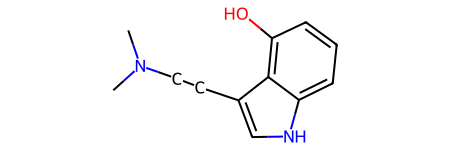

In [6]:
mols_noH[1]

## Generated Pharmacophores
Generate a DataFrame containing pharmacophores for a given model. Table is used to quickly assess differences between given molecules

In [7]:
pharm = Pharmacophore()

df = pharm.to_df(mols, mol_name, features='pharmacophore')
df

,serotonin,psilocin,mescaline
Donor,3,2,1
Aromatic,2,2,1
Acceptor,0,1,3
Hydrophobe,0,3,3


In [8]:
df = pharm.to_df(mols_noH, mol_name, features='pharmacophore')
df

,serotonin,psilocin,mescaline
Donor,3,2,1
Aromatic,2,2,1
Acceptor,0,1,3
Hydrophobe,0,3,3


Output default features. Can be used to output features associated with rdkit using the "features" param.

In [9]:
print(pharm.feature_types())

Default features: 
('Donor', 'Acceptor', 'Aromatic', 'Hydrophobe')


Calculate pharmacophore features for a given molecule. Can use 2 types. The default model or the model using default rdkit features.

In [10]:
# default
pharma = pharm.calc_pharm(mols_noH[0])
pharma

[['Donor', (9,), -0.9046174520168839, -2.235699615827842, 0.13645934200480064],
 ['Donor', (12,), 2.949925200279259, -0.15648413497184244, 1.2254205073233995],
 ['Donor', (6,), -2.5995394084260526, 2.931207478597561, -0.5905278269049035],
 ['Aromatic',
  (0, 1, 2, 3, 4, 5),
  -1.8583650464904398,
  0.29269000714402976,
  -0.18710545719859337],
 ['Aromatic',
  (2, 3, 7, 8, 9),
  -0.384216675975982,
  -1.2654866328983938,
  -0.2124065266290939]]

In [11]:
rdkit = pharm.calc_pharm(mols_noH[0], features='rdkit')
rdkit

[['Donor', (6,), -2.5995394084260526, 2.931207478597561, -0.5905278269049035],
 ['Donor', (9,), -0.9046174520168839, -2.235699615827842, 0.13645934200480064],
 ['Donor', (12,), 2.949925200279259, -0.15648413497184244, 1.2254205073233995],
 ['Acceptor',
  (6,),
  -2.5995394084260526,
  2.931207478597561,
  -0.5905278269049035],
 ['PosIonizable',
  (12,),
  2.949925200279259,
  -0.15648413497184244,
  1.2254205073233995],
 ['Aromatic',
  (2, 3, 7, 8, 9),
  -0.3842166759759821,
  -1.2654866328983938,
  -0.2124065266290939],
 ['Aromatic',
  (0, 1, 2, 3, 4, 5),
  -1.8583650464904393,
  0.2926900071440297,
  -0.1871054571985933],
 ['Hydrophobe',
  (3,),
  -0.5455923494913747,
  -0.12377573959149525,
  -0.4269264354726326],
 ['Hydrophobe',
  (7,),
  0.6351447927905208,
  -0.8202580958435296,
  -0.5701932594895972],
 ['Hydrophobe',
  (10,),
  1.932085873580742,
  -0.2536899744434478,
  -1.0263884835574422],
 ['LumpedHydrophobe',
  (0, 1, 2, 3, 4, 5),
  -1.8583650464904393,
  0.2926900071440297

In [12]:
pharma

[['Donor', (9,), -0.9046174520168839, -2.235699615827842, 0.13645934200480064],
 ['Donor', (12,), 2.949925200279259, -0.15648413497184244, 1.2254205073233995],
 ['Donor', (6,), -2.5995394084260526, 2.931207478597561, -0.5905278269049035],
 ['Aromatic',
  (0, 1, 2, 3, 4, 5),
  -1.8583650464904398,
  0.29269000714402976,
  -0.18710545719859337],
 ['Aromatic',
  (2, 3, 7, 8, 9),
  -0.384216675975982,
  -1.2654866328983938,
  -0.2124065266290939]]

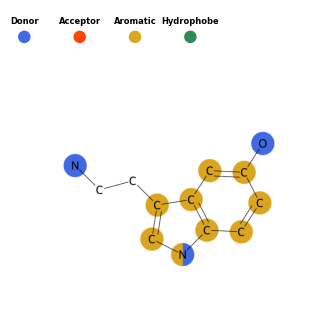

In [13]:
draw = Draw()
draw.draw_pharm(mols_noH[0], features='default')

In [14]:
pharm.output_features(pharma, 'data/pharma.pml')

Number of features: 5
Feature visualization script written to data/pharma.pml.
